# LDA 

This are the first steps within the project of LDA. 

In [3]:
K = 3 # Amount of topics one wants to find 

In [4]:
import nltk

# nltk.download('stopwords')
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from nltk.probability import FreqDist
from nltk import word_tokenize

import string
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import requests 
import html5lib
from bs4 import BeautifulSoup
import googletrans
from googletrans import Translator
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

[nltk_data] Downloading package stopwords to /Users/dj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Get the data

In [5]:
translator = Translator()
lemmatizer = WordNetLemmatizer()


def preprocess(filename):
    f = open(filename,'r')
    text = f.read()
    text = text.lower()

    text = str(translator.translate(text, dest = 'en', src = 'nl'))

    text_p = "".join([char for char in text if char not in string.punctuation])

    words = word_tokenize(text_p)
    
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]
    
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in filtered_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    pos = pos_tag(filtered_words)
    
    return words, filtered_words, stemmed, lemmatized, pos

In [6]:
words, filtered_words, stemmed, lemmatized, pos = preprocess('/Users/dj/Documents/GitHub/inbraak_6.txt')

In [7]:
url = '/Users/dj/Documents/GitHub/inbraak_'
numbers = np.arange(1,7)
ending = '.txt'

texts = []
for i in numbers:
    p = url + str(i) + ending
    f = open(p,'r')
    text = f.read()
    texts.append(text)

In [12]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stops = stopwords.words('english') + ['said', 'mr', 'co']

count = CountVectorizer(
    stop_words=stops,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.9,
)


In [13]:
# bow = count.fit_transform(f) # Texts is a list of strings -> in our case a list of the different court sentences

bow = count.fit_transform(texts)

ldask = LatentDirichletAllocation(
    n_components=K,
    max_iter=100, 
    random_state=42)
ldask.fit(bow)

LatentDirichletAllocation(max_iter=100, n_components=3, random_state=42)

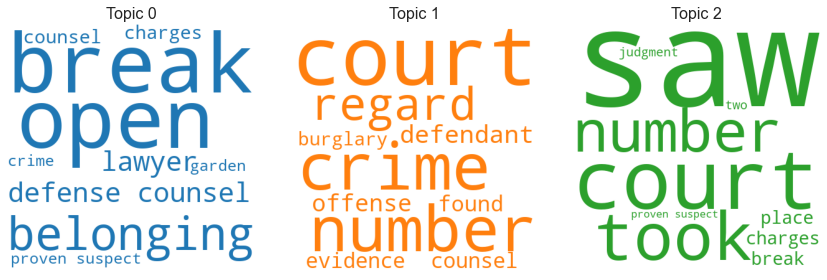

In [14]:
import math
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

nb_columns = 3
nb_rows = math.ceil(K / nb_columns)

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols * math.ceil(K / len(cols))

cloud = WordCloud(background_color='white',
                  width=400,
                  height=400,
                  max_words=10,
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

# This is different than with GENSIM
topics = ldask.components_ # np.array(3,35)
feature_names = count.get_feature_names() # list with 35 words in it
n_top_words = 10
# End Difference

fig, axes = plt.subplots(ncols=nb_columns, nrows=nb_rows, 
                         figsize=(4*nb_columns, 4*nb_rows), 
                         sharex=True, sharey=True)

for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
    # This is different than with GENSIM
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    topic_words = {feature_names[i]: topic[i] for i in top_features_ind}
    # End Difference

    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    ax.imshow(cloud)
    ax.set_title(f'Topic {i}', fontdict=dict(size=16))
    ax.axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [23]:
from textwrap import fill

topics_in_doc = ldask.transform(bow[0])

print(f'Document:\n{fill(texts[1])} \n')
print(f'Topics:')
for i, w in enumerate(topics_in_doc[0]):
    print(f'Topic #{i:>2d} : {w:.2f}')

Document:
Translated(src=nl, dest=en, text=made.2. The indictment The indictment
is attached to this judgment as an appendix. The indictment has been
amended in accordance with Article 313 of the Code of Criminal
Procedure. The suspicion, briefly and factually stated, means that the
suspect: Fact 1: broke into a house; Fact 2 and 3: always together and
in association with another has attempted to break into a home.3. The
preliminary questions The court has established that the summons is
valid, that it itself has jurisdiction to hear the case, that the
public prosecutor is admissible in the prosecution and that there are
no grounds for suspension of the prosecution. 4. Assessment of the
evidence4.1. The position of the public prosecutor The public
prosecutor considers it legally and convincingly proven that the
suspect committed the charges under count 1, 2 and 3 and bases this on
the evidence in the file. There is insufficient evidence for the
element of co-perpetration, as charged un

# Play around with function


In [31]:
print(ldask.components_.shape) # np array -> (amount of topics , 35 ?)

(3, 35)


In [32]:
print(ldask.components_)

[[ 0.334489    0.33443494  0.33449857  0.33473032  0.33482381  0.33446414
   0.3346081   0.33444559  0.33458455  0.33443647  0.33452531  0.33450513
   0.33461449  0.33448512  0.33447339  0.3345029   0.3344372   0.33452801
   0.33450415  0.33445424  0.33444157  0.33460866  0.33441913  0.33418113
   0.33481842  0.33450654  0.3343347   0.33435635  0.33450415  0.33453505
   0.33427044  0.33442505  0.33447255  0.33447354  0.33443315]
 [ 8.33040309  9.33091754  5.32929299 12.32511531 10.31825607 13.33176471
   6.31840745 10.33116566 15.32651716 52.31747835 30.33190079 20.32884972
   7.32953838 12.3263751  15.32715542  9.33041675 15.33238452  9.33052978
   4.32905926 10.32585499  8.32092394  4.3288467  28.32075977 18.3322874
  13.33066424  9.32055964  6.33210417  5.33208296  4.32905926  5.32428227
  20.3321818   8.2821891  13.32640503  8.31537817 11.32179797]
 [ 1.33510791  1.33464752  1.33620844  2.34015436  3.34692011  1.33377115
   3.34698445  1.33438875  2.33889829  6.34808518  0.33357391

In [29]:
print(count.get_feature_names())

['acquitted', 'also', 'attached', 'belonging', 'break', 'burglary', 'charges', 'circumstances', 'counsel', 'court', 'crime', 'defendant', 'defense counsel', 'established', 'evidence', 'file', 'found', 'garden', 'indictment attached', 'investigation', 'judgment', 'lawyer', 'number', 'offense', 'open', 'place', 'position defense', 'position public', 'pronunciation extra_data', 'proven suspect', 'regard', 'saw', 'statement', 'took', 'two']


In [30]:
print(len(count.get_feature_names()))

35


In [33]:
CountVectorizer?

Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

Read more in the :ref:`User Guide <text_feature_extraction>`.

Parameters
----------
input : string {'filename', 'file', 'content'}, default='content'
    If 'filename', the se